# Question 3

In [1]:
#Import required packages
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#seed random number generator of numpy for reproducibility
seed=100
np.random.seed(seed)

## Data Generation

### Mean and Covariance Matrix type


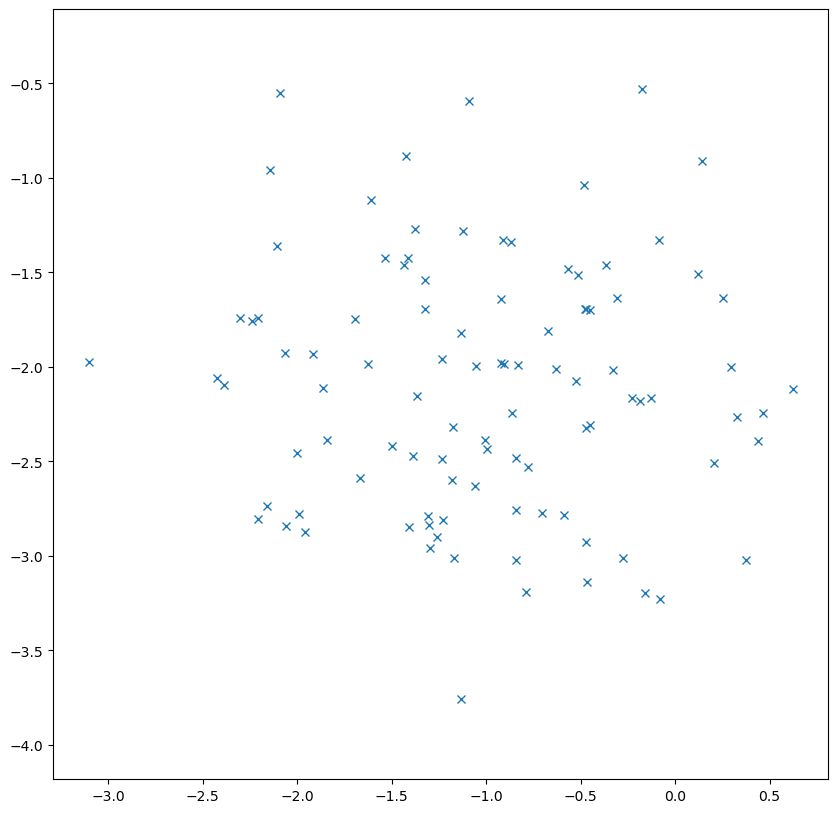

In [3]:
#Generate Dataset_1 Mean=[-1,-2]
mean=np.array([-1,-2])
cov=np.array([
    [0.5, 0],
    [0, 0.5]
])

num_points=100
D1 = np.random.multivariate_normal(mean, cov, num_points)
x1,y1=D1.T

#Adding Label +1 
D1=np.insert(D1,D1.shape[1],int(1),axis=1)

#plotting D1
plt.figure(figsize=(10,10))
plt.plot(x1, y1, 'x')
plt.axis('equal')
plt.show()

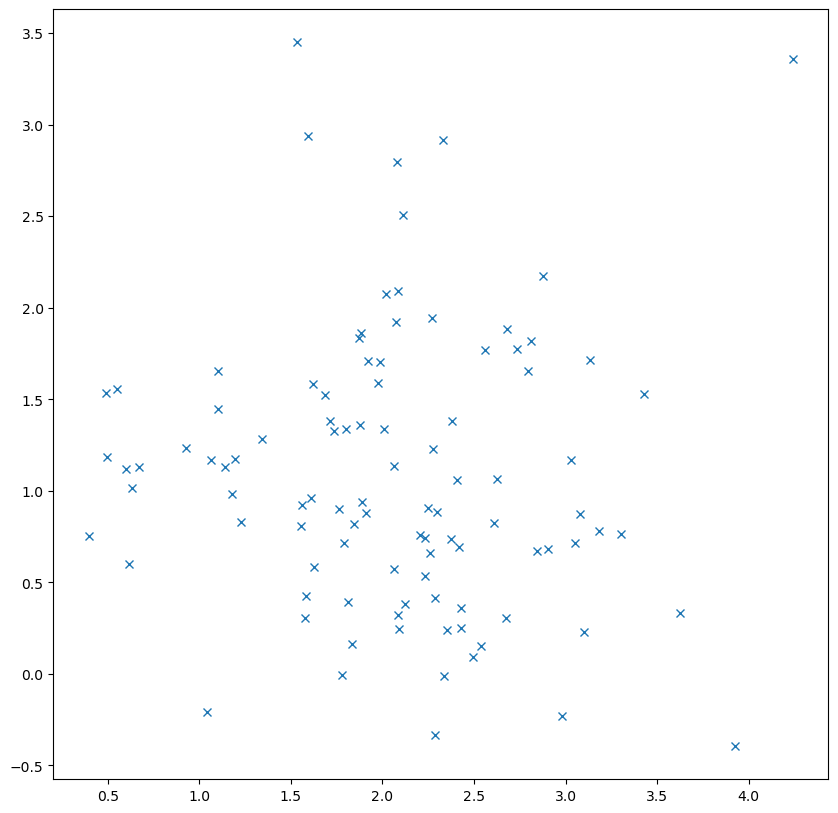

In [4]:
#Generate Dataset_2 Mean=[2,1]
mean=np.array([2,1])
cov=np.array([
    [0.5, 0],
    [0, 0.5]
])

D2 = np.random.multivariate_normal(mean, cov, num_points)
x2, y2 = D2.T

#Adding Label -1 
D2=np.insert(D2,D2.shape[1],int(-1),axis=1)

plt.figure(figsize=(10,10))
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

In [5]:
#Construct D and shuffle
D=np.concatenate((D1,D2),axis=0)
np.random.shuffle(D)
print("Shape of the Dataset",D.shape)

Shape of the Dataset (200, 3)


## Data Visualization

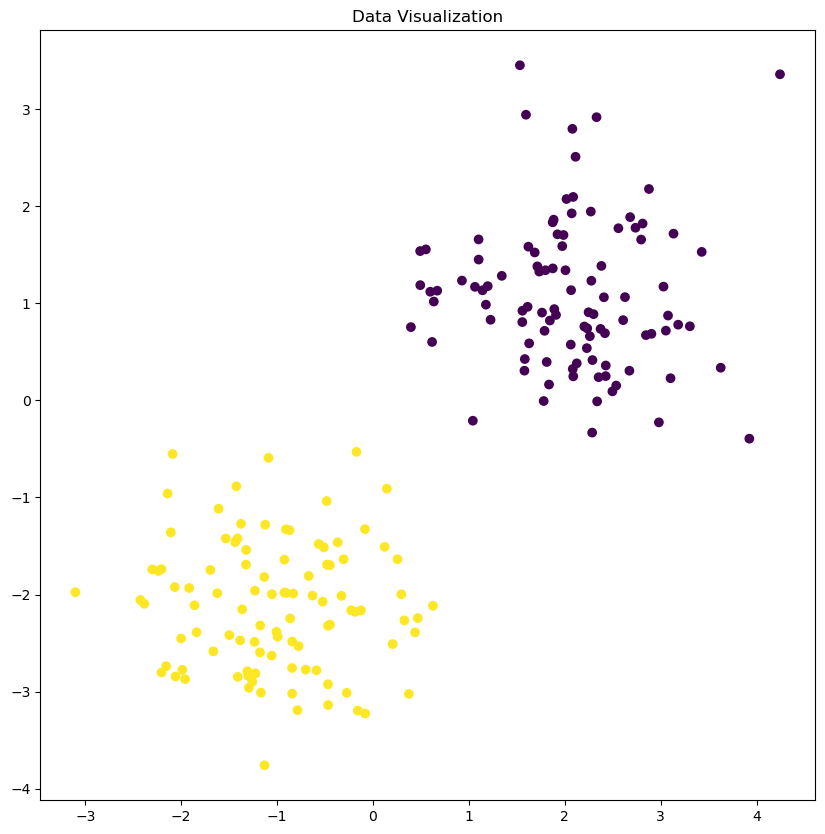

In [6]:
def plot_data(data,lineplot=False):
  if data.shape[1]!=3:
    raise Exception("Add label")
  x,y,label=data.T
  

  plt.figure(figsize=(10,10))
  plt.scatter(x, y, c=label)

  if not lineplot:
    plt.title('Data Visualization')
    plt.show()

# Plot the data points
plot_data(D)

### COMMENTS ON DATASET

- From the above data we can observe that the dataset is linearly separable by a straight line

# Q3: Part A

## Perceptron prediction function

In [7]:
def perceptron_prediction(w, x):
    # Code to compute the prediction for the example x using weight w
    pred=np.dot(w,x)
    if pred>=0:
      prediction = +1
    else:
      prediction = -1
    
    return prediction

## Function to update weights 

In [8]:
def perceptron_update_weights(w, x, y, y_pred):
    is_mistake = False
    # Check for mistake and set is_mistake flag True/False
    if y_pred!=y:
      is_mistake=True
      w=w+y*x
    return w, is_mistake

## Perceptron Training Algorithm

In [9]:
def train_perceptron(data, ANIMATE=False):
    #Initialize weights 
    np.random.seed(seed)
    w=np.random.normal(0.5, 1.0, data.shape[1]) # Sampling weights over Gaussian distribution
    print(w)
    epochs=0 
    num_mistakes = 30 # Initial number of mistakes
    max_epochs = 100

    #storing all weights
    wAll=[]
    mistake=[]
    wAll.append(w)

    while num_mistakes > 0 and epochs<max_epochs:   # Until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            # Feature Set
            x = data[i,0:2]
            # Append bias
            x = np.concatenate((x,1), axis=None)
            
            y_hat = perceptron_prediction(w, x)
            
            # Store Labels in y
            y = data[i,2]
            
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            
            
            if is_mistake:
              num_mistakes += 1

        epochs=epochs+1
        wAll.append(w)
        mistake.append(num_mistakes)
    
    #for animation
    if ANIMATE:
      return wAll, epochs, mistake

    return w

## Plotting the separating line

In [10]:
def plot_data_with_separator(data, w, MULTIPLE_PLOT=False, LABEL=None):
  # Code for plotting
  if not MULTIPLE_PLOT:
    plot_data(data,True)
  #using two points in a line to plot
  xPoint=np.array([0,0])
  xPoint[0]=min(data[:,0])-1
  xPoint[1]=max(data[:,0])+1
  yPoint= (w[0]*xPoint+w[2])/(-w[1])
  if LABEL is None:
    plt.plot(xPoint,yPoint)
  plt.plot(xPoint,yPoint,label=LABEL)

In [11]:
w_final_0 = train_perceptron(D)   
w_final_0 

[-1.24976547  0.8426804   1.6530358 ]


array([-2.35099175, -0.81429259,  0.6530358 ])

### Calling the plot function to plot separator

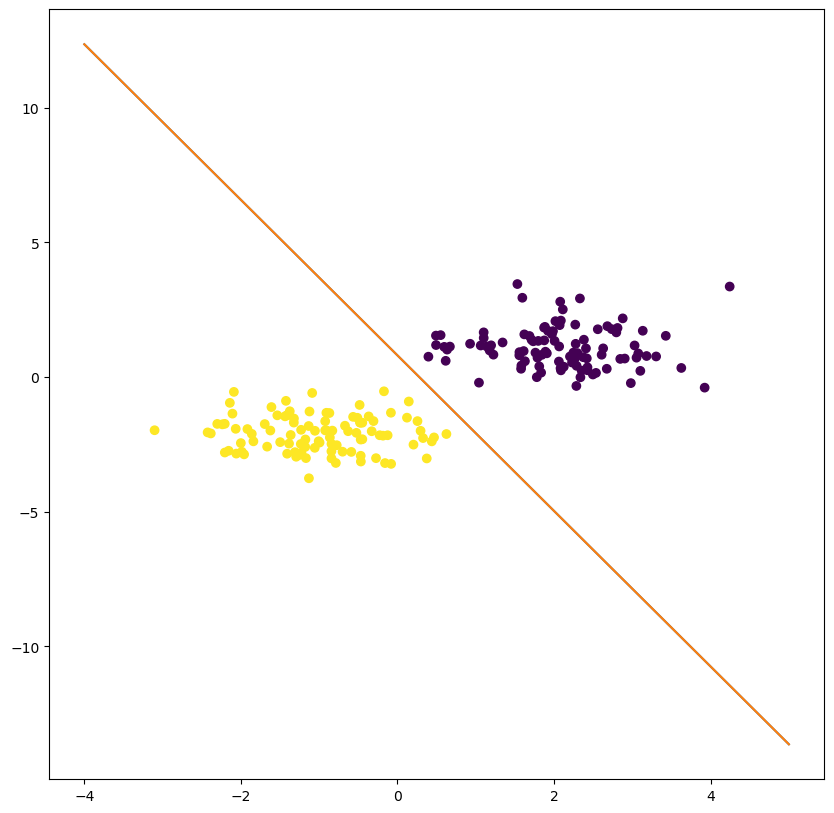

In [12]:
plot_data_with_separator(D, w_final_0)
plt.show()

### Animated Display



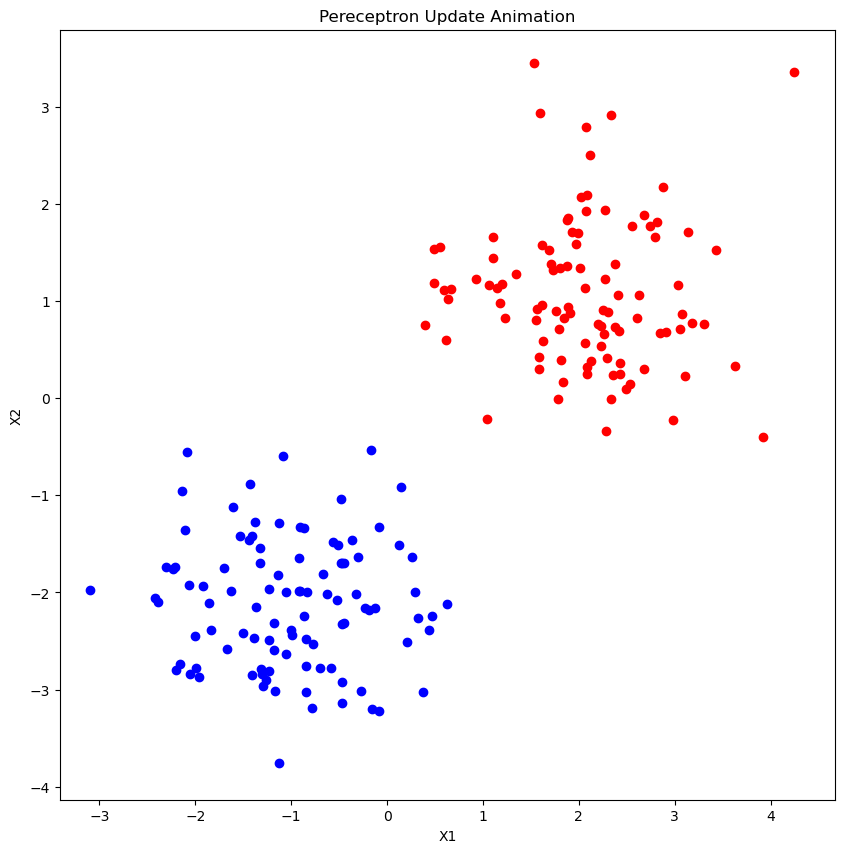

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=D
x1,y1,_=D1.T
x2,y2,_=D2.T

# create a figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1)   


# set up the subplots as needed
ax1.set_xlim((1.1*min(min(x2), min(x1)), 1.1*max(max(x2), max(x1))))            
ax1.set_ylim((1.1*min(min(y2), min(y1)), 1.1*max(max(y2), max(y1))))
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')



# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('Pereceptron Update Animation')
line1, = ax1.plot([], [], 'g', lw=2)     # ax.plot returns a list of 2D line objects



line2 = ax1.plot(x1,y1,'bo',x2,y2,'ro')



In [14]:
# Animation function
xPoint=np.array([0,0])
xPoint[0]=min(data[:,0])-1
xPoint[1]=max(data[:,0])+1

WALL_0, EPOCHS_0, MISTAKE_0=train_perceptron(data,ANIMATE=True)
def drawframe(n):
   
    w=WALL_0[n]
    yPoint= (w[0]*xPoint+w[2])/(-w[1])
    line1.set_data(xPoint, yPoint)
    txt_title.set_text('EPOCH Number {0:4d}'.format(n))
    return line1,


[-1.24976547  0.8426804   1.6530358 ]


In [15]:
from matplotlib import animation
anim = animation.FuncAnimation(fig, drawframe, frames=EPOCHS_0+1, interval=1000, blit=True)

In [16]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Plot Number of Mistakes

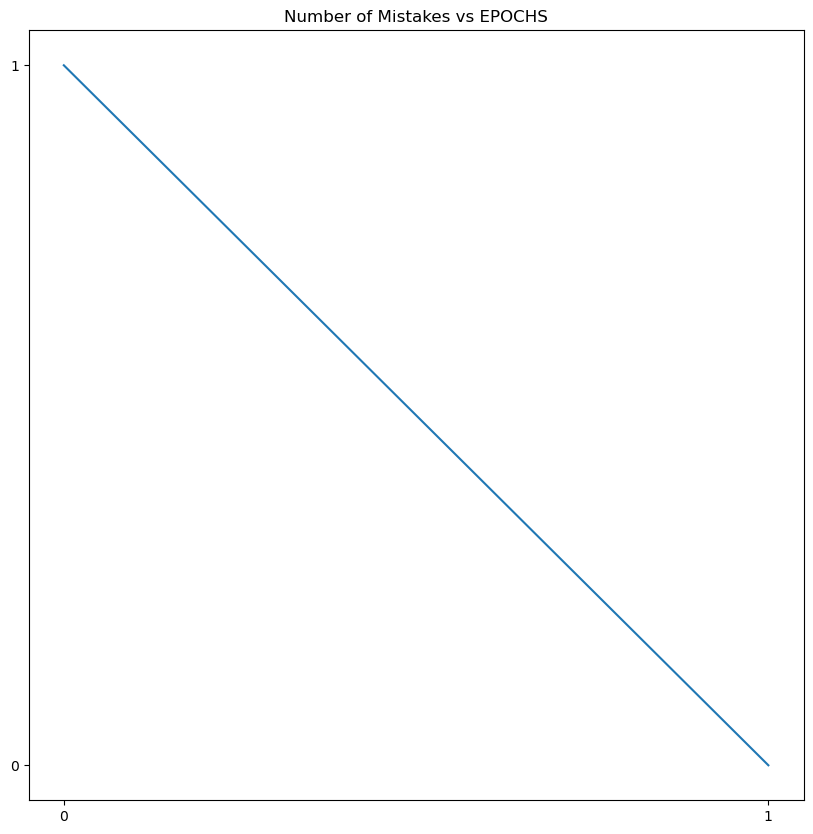

In [17]:
import math 
yint = range(min(MISTAKE_0), math.ceil(max(MISTAKE_0))+1)



plt.figure(figsize=(10,10))
plt.plot(list(range(0,EPOCHS_0)),MISTAKE_0)

plt.yticks(yint)
plt.xticks(list(range(0,EPOCHS_0)))
plt.title("Number of Mistakes vs EPOCHS")
plt.show()

# Q3: Part b

In [18]:
# Define the sigma function as well as the derivative
def sigmoid(a):
  return (2*a)/(np.abs(2*a)+1)

def sigmoid_der(a):
  # Using first order derivative
  h=0.0001
  return (sigmoid(a+h)-sigmoid(a-h))/(2*h)

In [19]:
def S_perceptron_prediction(w, x):
    # Update correction
    pred=sigmoid(np.dot(w,x))
    if pred>=0:
      prediction = +1
    else:
      prediction = -1
    
    return prediction

In [20]:
def S_perceptron_update_weights(w, x, y, y_pred,eta):
    is_mistake = False
    #cCheck for mistakes and update w accordingly
    if y_pred!=y:
      is_mistake=True
      w=w+eta*(y-sigmoid(np.dot(w,x)))*(sigmoid_der(np.dot(w,x)))*x
    return w, is_mistake

In [21]:
def train_S_perceptron(data, eta=0.01,ANIMATE=False):
    #Initialize weights 
    np.random.seed(seed)
    w=np.random.normal(0.5, 1.0, data.shape[1]) # Sampling weights over normal distribution
    print(w)
    epochs=0 
    num_mistakes = 30 # Initial number of mistakes considered
    max_epochs = 100

    #storing all weights
    wAll=[]
    mistake=[]
    wAll.append(w)

    while num_mistakes > 0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,1), axis=None)
            
            y_hat = S_perceptron_prediction(w, x)
            
            #retrieve the label y for x from data set D 
            y = data[i,2]
            
            w, is_mistake = S_perceptron_update_weights(w, x, y, y_hat,eta)
            
            
            if is_mistake:
              num_mistakes += 1

        epochs=epochs+1
        wAll.append(w)
        mistake.append(num_mistakes)
    
    #for animation
    if ANIMATE:
      return wAll, epochs, mistake

    return w

###  Q3b: PART B - (i)

In [22]:
wAll=[]
epochs=[]
mistake=[]
w_final=[]
eta_val=[0.01,0.001,0.0001]
for eta in eta_val:
  w,e,m=train_S_perceptron(D,eta,True)
  wAll.append(w)
  epochs.append(e)
  mistake.append(m)
  w_final.append(w[-1])
  

[-1.24976547  0.8426804   1.6530358 ]
[-1.24976547  0.8426804   1.6530358 ]
[-1.24976547  0.8426804   1.6530358 ]


In [23]:
print("Final Weights: ",w_final)
print("Total Number of epochs Used",epochs)

Final Weights:  [array([-1.86291868, -0.34087601,  0.96155488]), array([-1.80741499, -0.21519422,  1.07841927]), array([-1.49809148,  0.390102  ,  1.54567112])]
Total Number of epochs Used [18, 100, 100]


###  Q3b: PART B - (ii)

### Plot for various values of $\eta$

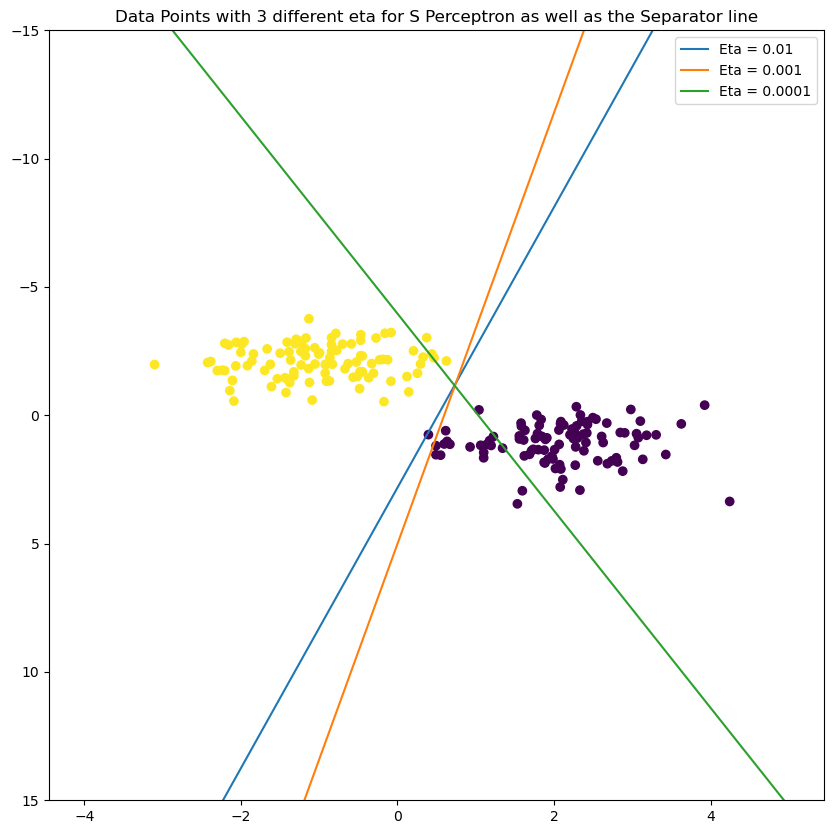

In [24]:
plot_data(D,lineplot=True)
for i,eta in enumerate(eta_val):
  plot_data_with_separator(D, w_final[i], MULTIPLE_PLOT=True, LABEL="Eta = "+str(eta))

plt.legend()
plt.ylim(15,-15)
plt.title("Data Points with 3 different eta for S Perceptron as well as the Separator line")
plt.show()


## Number of Mistakes plot

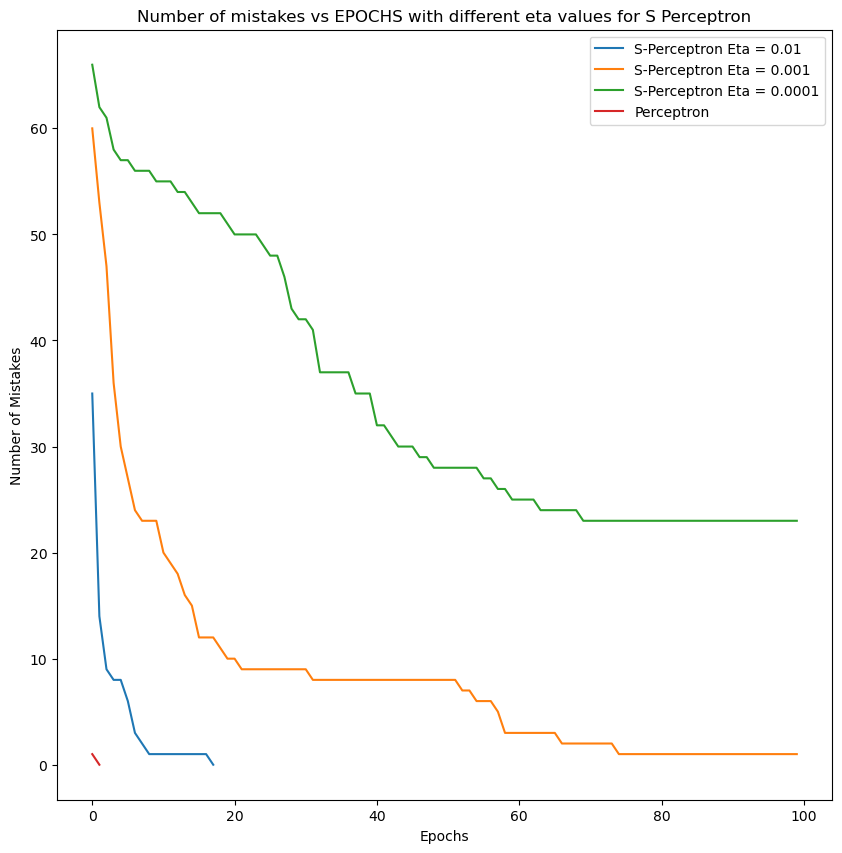

In [25]:
plt.figure(figsize=(10,10))
for i,eta in enumerate([0.01,0.001,0.0001]):
  plt.plot(list(range(0,epochs[i])),mistake[i],  label="S-Perceptron Eta = "+str(eta))

plt.plot(list(range(0,EPOCHS_0)),MISTAKE_0,label="Perceptron")

plt.xlabel("Epochs")
plt.ylabel("Number of Mistakes")
plt.legend()
plt.title("Number of mistakes vs EPOCHS with different eta values for S Perceptron")
plt.show()

### COMMENTS AND CONCLUSION:

-  From the above plot we can see the plots of separator line along with the data.

-  As can be seen from the plot, as eta increases the time taken / the number of epochs also increases.

-  The S-perceptron with eta=0.01 converged within 18 epochs whereas the eta> 0.01 was not able to converge within 100 epochs.

-  By comparing with the perceptron training algorithm we can say that the perceptron training algorithm converges faster than the S-perceptron training algorithm. Thus, in this case where the data is linearly separable we can say that Perceptron performs better than S-perceptron

-  The number of mistakes also drops rapidly as value of eta is increased since the S-perceptron learns faster with higher eta.

###  Q3b: PART B - (iii)

In [26]:
w_final

[array([-1.86291868, -0.34087601,  0.96155488]),
 array([-1.80741499, -0.21519422,  1.07841927]),
 array([-1.49809148,  0.390102  ,  1.54567112])]

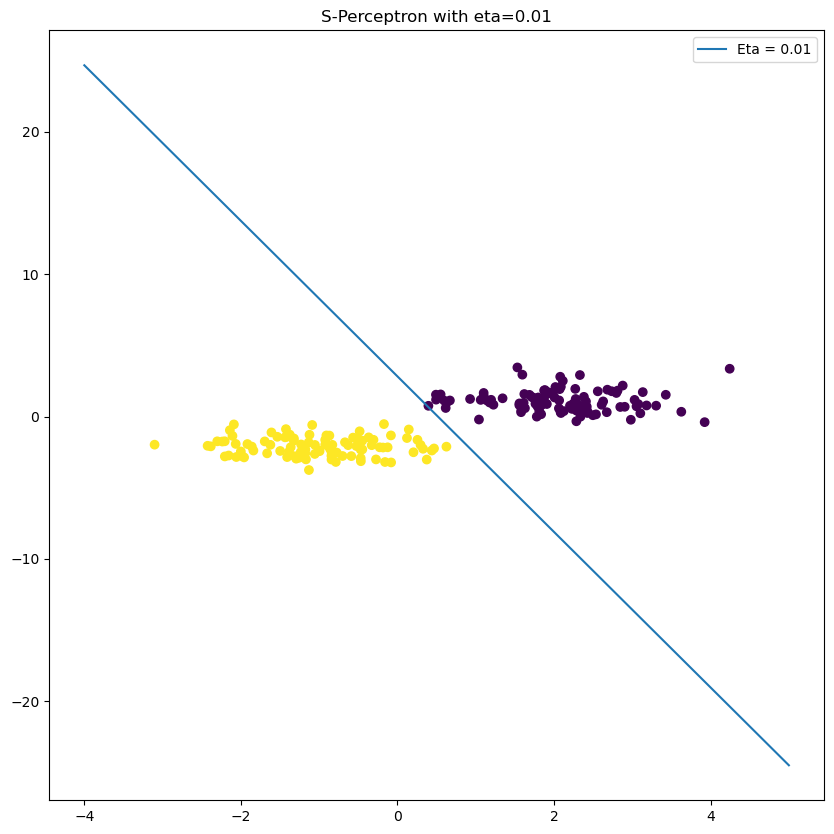

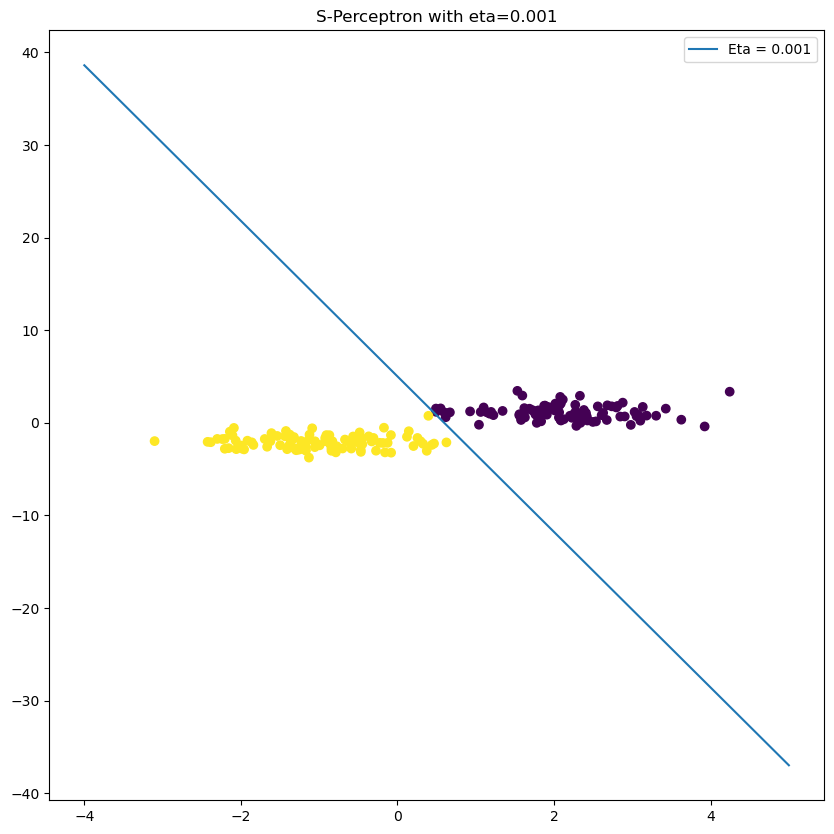

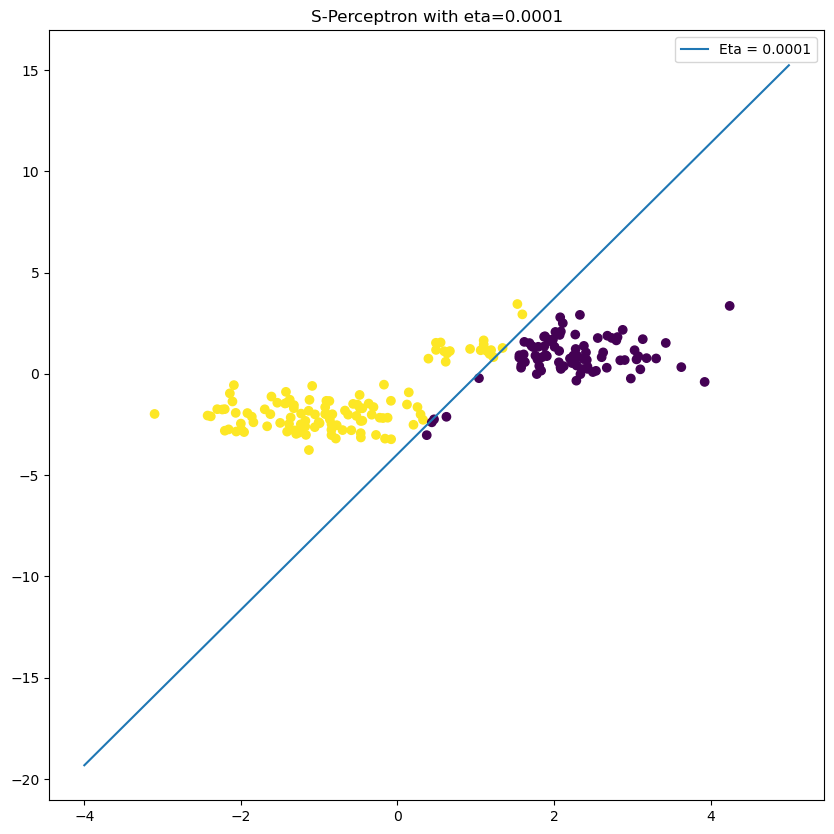

In [27]:
for w,eta in list(zip(w_final,[0.01,0.001,0.0001])):
  for i in range(len(D)):
            #retrieve the feature vector x from data set D 
            x = D[i,0:2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate((x,1), axis=None)
            
            y_hat = S_perceptron_prediction(w, x)
            #update label
            D[i,2] = y_hat
  
  plot_data_with_separator(D, w, MULTIPLE_PLOT=False, LABEL="Eta = "+str(eta))
  plt.title(f"S-Perceptron with eta={eta}")
  plt.legend()
  plt.show()




### COMMENTS AND CONCLUSION:

- From the above plots, we can see that as eta value decreases the seprator line does not seem to converge within 100 epochs and mistakes still remain.

### Q3: Part C

### New Data generate

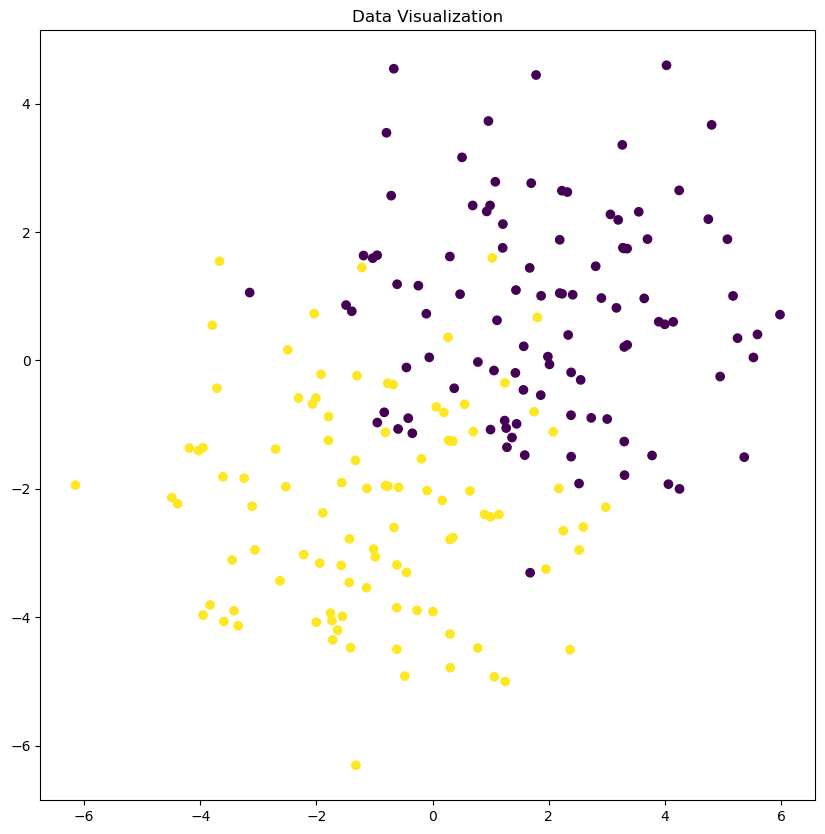

In [28]:
#Generate D_1
mean1=np.array([-1,-2])
cov=np.array([
    [3, 0],
    [0, 3]
])
num_points=100
#seed random number generator of numpy for reproducibility
np.random.seed(seed)
d1 = np.random.multivariate_normal(mean1, cov, num_points)
x1,y1=d1.T
#Adding Label +1 
d1=np.insert(d1,d1.shape[1],int(1),axis=1)


mean2=np.array([2,1])
#seed random number generator of numpy for reproducibility
np.random.seed(seed)
d2 = np.random.multivariate_normal(mean2, cov, num_points)
x2, y2 = d2.T
#Adding Label -1 
d2=np.insert(d2,d2.shape[1],int(-1),axis=1)

#Construct D and shuffle
D1=np.concatenate((d1,d2),axis=0)
np.random.shuffle(D1)

plot_data(D1)

### COMMENTS :

- From the above plot we can say that the dataset generated is not linearly separable.

## Check for Perceptron

In [29]:
WALL_1, EPOCHS_1, MISTAKE_1= train_perceptron(D1,True)
EPOCHS_1

[-1.24976547  0.8426804   1.6530358 ]


100

In [30]:
print("Mistake in last epochs is ", MISTAKE_1[-1])

Mistake in last epochs is  33


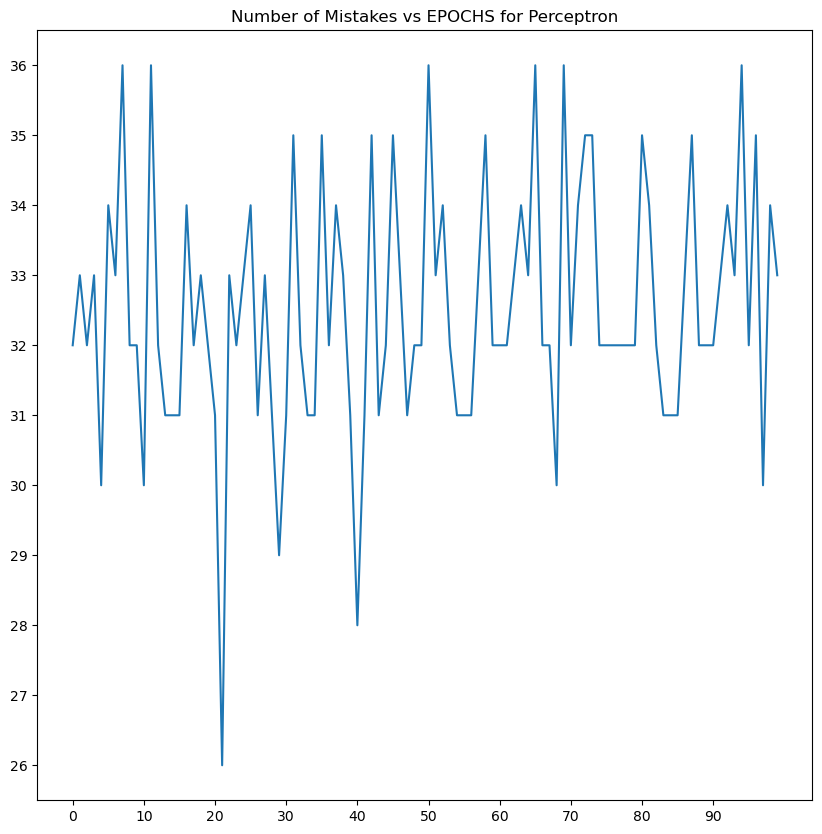

In [31]:
yint = range(min(MISTAKE_1), math.ceil(max(MISTAKE_1))+1)

plt.figure(figsize=(10,10))
plt.plot(list(range(0,EPOCHS_1)),MISTAKE_1)

plt.yticks(yint)
plt.xticks(list(range(0,EPOCHS_1,10)))
plt.title("Number of Mistakes vs EPOCHS for Perceptron")
plt.show()

### COMMENTS:

- In this case as we can see the fluctuation in the separating line by the perceptron. The lowest mistake made is 26.

## S-Perceptron

In [32]:
wAll=[]
epochs=[]
mistake=[]
w_final=[]
for eta in [0.01,0.001,0.0001]:
  w,e,m=train_S_perceptron(D1,eta,True)
  wAll.append(w)
  epochs.append(e)
  mistake.append(m)
  w_final.append(w[-1])
  

[-1.24976547  0.8426804   1.6530358 ]
[-1.24976547  0.8426804   1.6530358 ]
[-1.24976547  0.8426804   1.6530358 ]


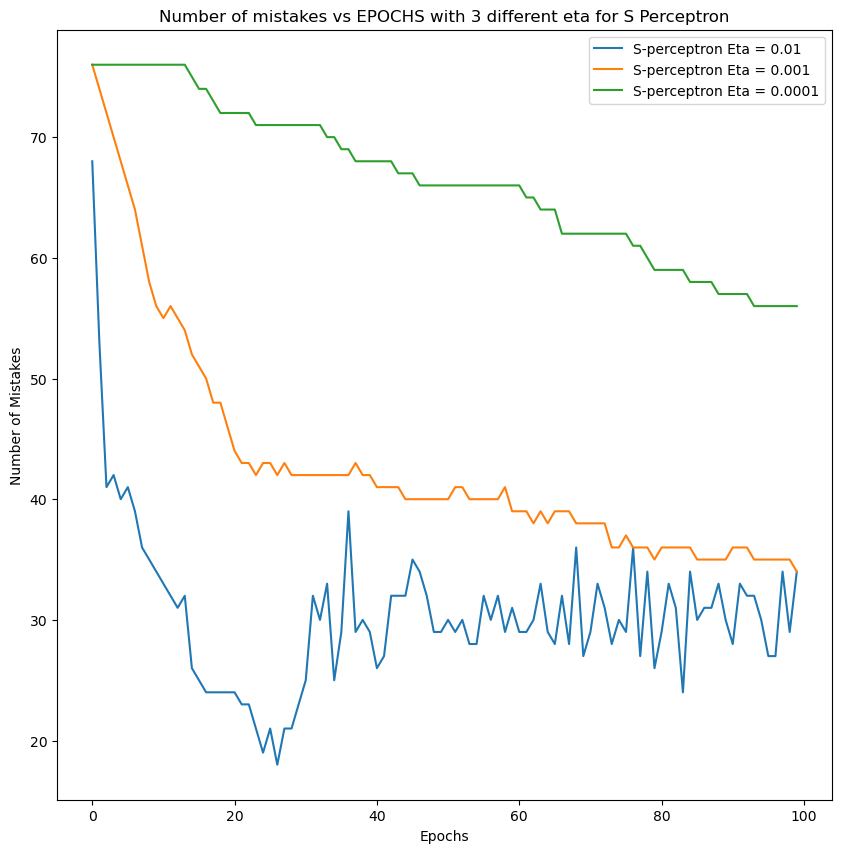

In [33]:
plt.figure(figsize=(10,10))
for i,eta in enumerate(eta_val):
  plt.plot(list(range(0,epochs[i])),mistake[i],  label="S-perceptron Eta = "+str(eta))

plt.xlabel("Epochs")
plt.ylabel("Number of Mistakes")
plt.legend()
plt.title("Number of mistakes vs EPOCHS with 3 different eta for S Perceptron")
plt.show()

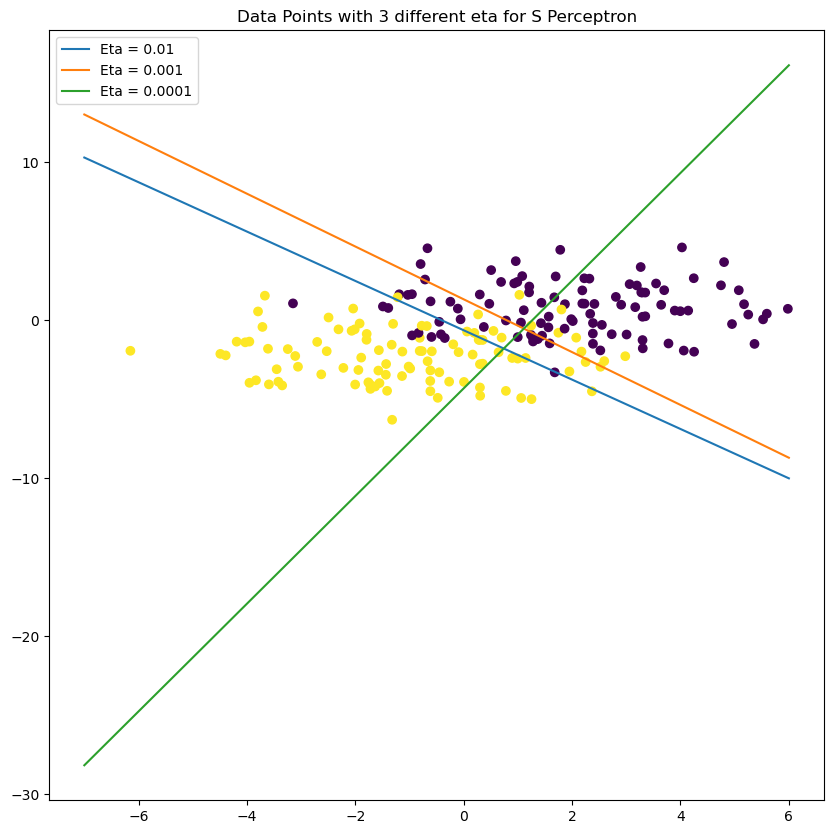

In [34]:
plot_data(D1,lineplot=True)
for i,eta in enumerate(eta_val):
  plot_data_with_separator(D1, w_final[i], MULTIPLE_PLOT=True, LABEL="Eta = "+str(eta))

plt.legend()
plt.title("Data Points with 3 different eta for S Perceptron")
plt.show()

## COMMENTS AND FINAL CONCLUSION:

- The perceptron training algorithm continues to make huge mistakes throughout all the epochs.

- In the case of S-perceptron we can see that upto 100 epochs the algorithms continues to reduce the number of mistakes made at a steady pace.

- For the S perceptron we can see that for eta=0.01, we can see fluctuation. However, as eta decreases the fluctuations become negligible after some initial ones. We see a constant decrease in mistakes with number of epochs as the value of eta decreases.

- Overall, we can say that S-perceptron with small values of eta is better than perceptron algorithm for dataset which is not linearly separable.